In [1]:
from pathlib import Path
import os
import cv2
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform

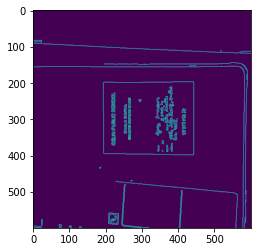

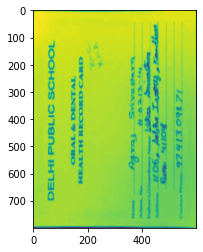

In [2]:
# read, resize, and make a copy of the image
img = cv2.imread('WhatsApp Image 2021-12-24 at 12.11.51 PM.jpeg')
img = cv2.resize(img, (600, 600))
orig_img = img.copy()

# preprocess the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(img, 75, 200)
plt.imshow(edged)
plt.show()
# find and sort the contours
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
# for contour in contours:
#     temp = orig_img.copy()
#     cv2.drawContours(temp, [contour], -1, (0,255,0), 3)
#     peri = cv2.arcLength(contour, True)
#     approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
#     print(len(contour))
#     print(len(approx))
#     plt.imshow(temp)
#     plt.show()
    
# go through each contour
for contour in contours:
    # approximate each contour
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
    # check if we have found our document
    if len(approx) == 4:
        doc_cnts = approx
        break

# apply warp perspective to get the top-down view
warped = four_point_transform(orig_img, doc_cnts.reshape(4, 2))
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
final_img = cv2.resize(warped, (600, 800))

# write the image in the ouput directory
# cv2.imwrite("output" + "/" + os.path.basename(img_file), final_img)
plt.imshow(final_img)
plt.show()